# Quora Question Pairs 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

In [3]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
print(train_df.shape)
print(test_df.shape)

(404290, 6)
(2345796, 3)


400K rows and 6 columns in train set and about 2.35M rows and 3 columns in test set.

In [4]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
test_df.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
duplicate = train_df['is_duplicate'].value_counts()
duplicate / duplicate.sum()

0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64

So the ratio is 37 % positive and 63 % negative scenarios. 

#### Lets Visualize it on Bar Chart

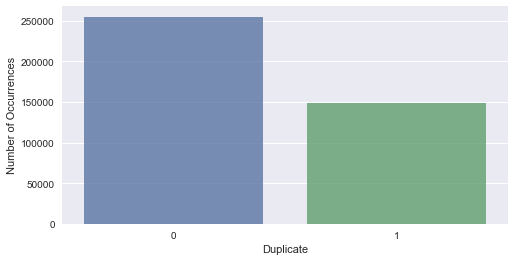

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(duplicate.index, duplicate.values, alpha=0.8)
plt.ylabel('Number of Occurrences')
plt.xlabel('Duplicate')
plt.show()

#### id,qid1 and qid2 are not useful for further processing.

In [9]:
train_df = train_df.drop(['id', 'qid1', 'qid2'], axis=1)

In [10]:
train_df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Feature Engineering

* First clean the sentences and remove stop words. <br >
* Then use different Natural Language Techniques and model to generate new features.